In [1]:
import matplotlib.pyplot as plt

def plot_train_valid_learn_rate(train_metrics, learn_rate=False, metric_name='loss'):

    train_losses = [metrics['train'][metric_name] for metrics in train_metrics]
    valid_losses = [metrics['valid'][metric_name] for metrics in train_metrics]

    train_epochs = range(1, len(train_losses) + 1)
    valid_epochs = range(1, len(valid_losses) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(train_epochs, train_losses, label='Train '+metric_name)
    ax1.plot(valid_epochs, valid_losses, label='Valid '+metric_name)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    ax1.set_xticks(range(1, max(train_epochs)+1))

    learning_rates = [metrics['learning_rate'] for metrics in train_metrics]

    if learn_rate:
        ax2 = ax1.twinx()
        ax2.plot(train_epochs, learning_rates, label='Learning Rate', linestyle='--', color='red')
        ax2.set_ylabel('Learning Rate')

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.title('Loss and Learning Rate over epochs')
    plt.show()

In [2]:
import json

def get_train_metrics(train_id, old=False, ignore_epoch_0=True):
    if not old:
        with open(f"out/{train_id}/train_metrics.json") as f:
            train_metrics = json.load(f)
    else:
        with open(f"out/{train_id}/train.json") as f:
            train_metrics = json.load(f)['metrics']
    if ignore_epoch_0:
        return train_metrics[1:] # ignore epoch 0 for now
    return train_metrics

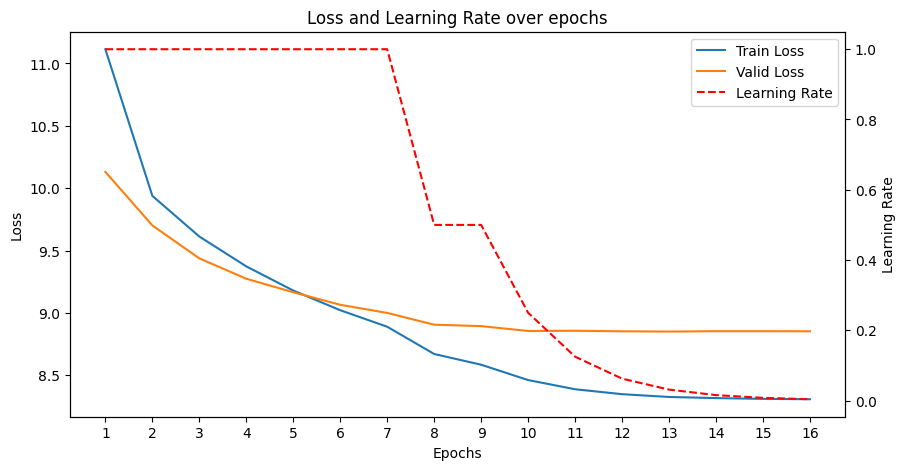

In [9]:
# 19 després de dinar
# sembla que encara que es reudeixi el learning_rate, la loss de validation ja no baixa gaire més.
# Potser he arribat al límit del que es pot aconseguir amb un model amb tants pocs paràmetres?
# A Més crec que li he posat el min_learning_rate massa baix, ara a penes es modifica el model ja en aquestes èpoques
plot_train_valid_learn_rate(get_train_metrics('train_id_5'), learn_rate=True)

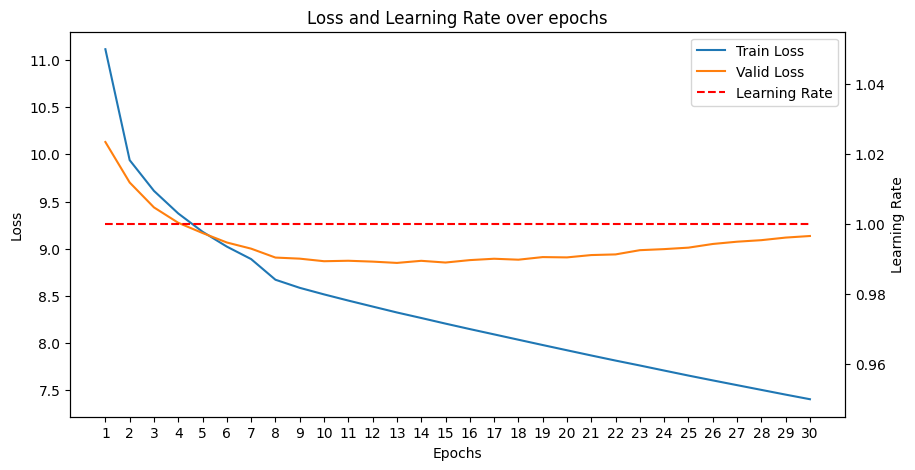

In [5]:
# 19 maig al dinar. WTF no s'ha reduït el learning_rate
plot_train_valid_learn_rate(get_train_metrics('train_id_4'), learn_rate=True)

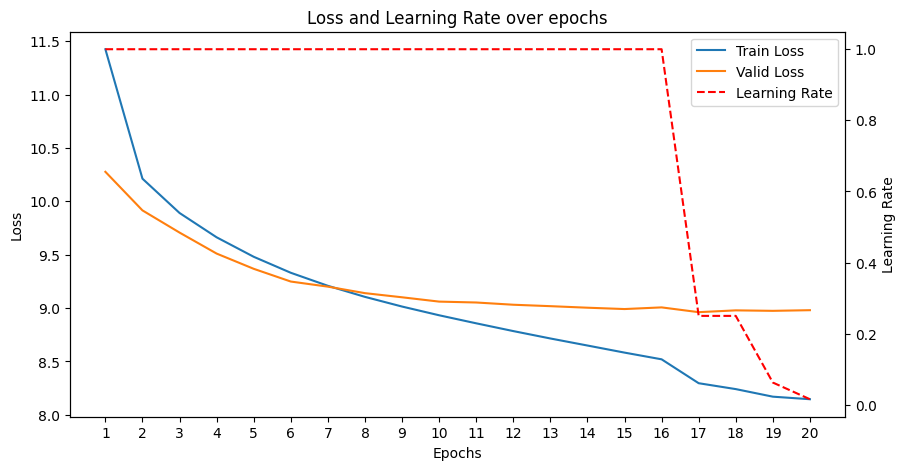

In [23]:
# 19 maig mentre esmorzava, he vist que hi havia un plateau del valid_loss i massa overfitting amb aquesta strat
plot_train_valid_learn_rate(get_train_metrics('train_id_4', old=True), learn_rate=True)

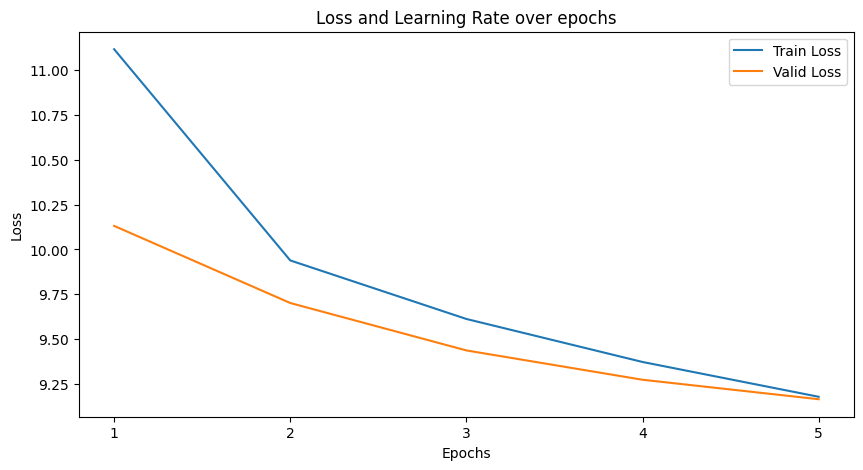

In [ ]:
# 19 maig ja bo però només 5 èpoques
plot_train_valid_learn_rate(get_train_metrics('train_id_13'), learn_rate=False)

In [9]:
[epoch['train']['loss'] for epoch in get_train_metrics('train_id_good2', ignore_epoch_0=True)]

[20.102746963500977,
 11.294787406921387,
 7.22144889831543,
 5.9992241859436035,
 5.5727763175964355,
 5.3090667724609375,
 5.137112617492676,
 4.912588596343994,
 4.777961254119873,
 4.715607166290283,
 4.686622142791748,
 4.667737007141113,
 4.6588850021362305,
 4.654262542724609]

In [7]:
[epoch['valid']['loss'] for epoch in get_train_metrics('train_id_good2', ignore_epoch_0=False)]

[21.10478973388672,
 11.522049903869629,
 8.298723220825195,
 6.221165180206299,
 5.687691688537598,
 5.425846099853516,
 5.174779415130615,
 5.183921813964844,
 5.2409281730651855,
 5.207818031311035,
 5.270230770111084,
 5.3001275062561035,
 5.271865367889404,
 5.291461944580078,
 5.289504051208496]

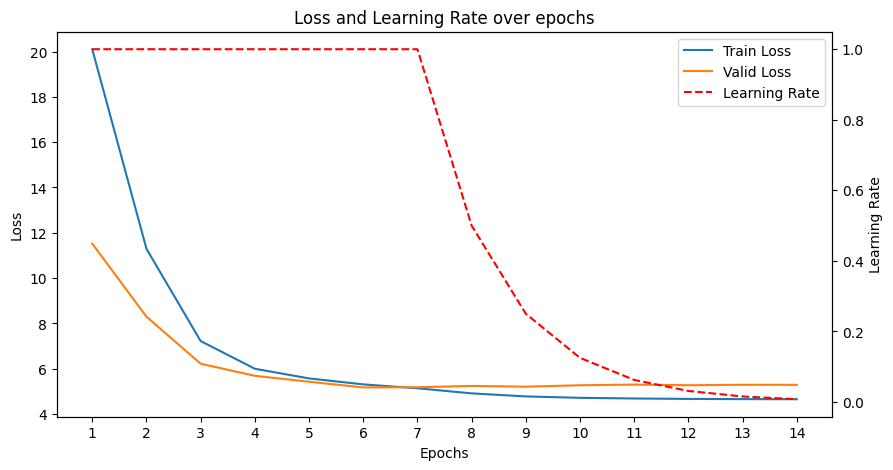

In [13]:
# looks pretty good, sembla que puc baixar el learning_rate molt abans hehehehehehhe
plot_train_valid_learn_rate(get_train_metrics('train_id_good2'), learn_rate=True)

# el bo?

In [1]:
import json

def get_train_metrics(train_id, ):
    with open(f"out/{train_id}/train_metrics.json") as f:
        return json.load(f)

train_metrics = get_train_metrics('train_id_good5')

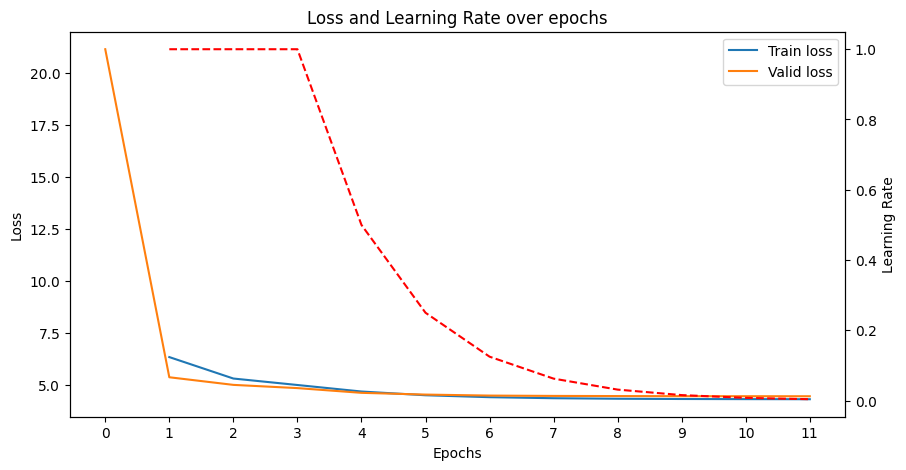

In [6]:
import matplotlib.pyplot as plt

# This was automatically made by copilot so it's not much well designed...

def plot_train_valid_learn_rate2(train_metrics, learn_rate=False, metric_name='loss', skip_zero=False):

    train_losses, valid_losses = [], []
    train_epochs, valid_epochs = [], []

    for epoch in train_metrics:
        if epoch['epoch'] == 0 and skip_zero:
            continue
        if 'train' in epoch:
            train_losses.append(epoch['train'][metric_name])
            train_epochs.append(epoch['epoch'])
        if 'valid' in epoch:
            valid_losses.append(epoch['valid'][metric_name])
            valid_epochs.append(epoch['epoch'])

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(train_epochs, train_losses, label='Train '+metric_name)
    ax1.plot(valid_epochs, valid_losses, label='Valid '+metric_name)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    ax1.set_xticks(range(max(train_epochs)+1))
    
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    if learn_rate:
        learning_rates = [metrics['learning_rate'] for metrics in train_metrics[1:]]
        ax2 = ax1.twinx()
        ax2.plot(train_epochs, learning_rates, label='Learning Rate', linestyle='--', color='red')
        ax2.set_ylabel('Learning Rate')

    plt.title('Loss and Learning Rate over epochs')
    plt.show()

# La tasca del context aquesta m'està fent empitjorar la loss total
plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='loss')

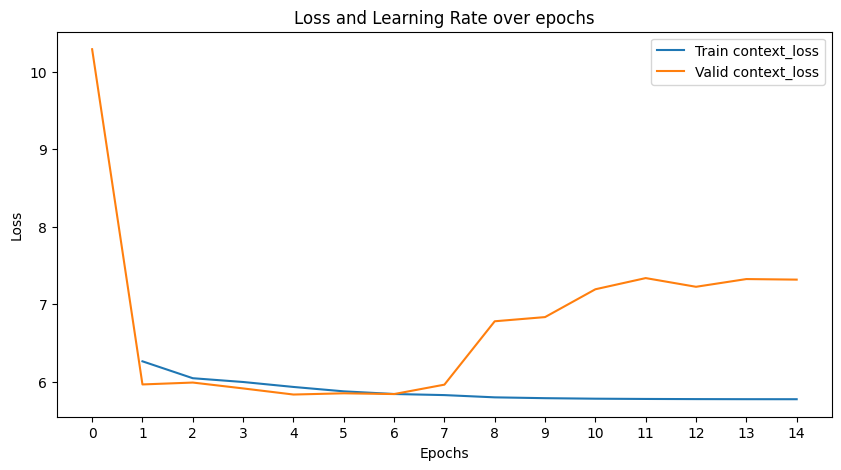

In [28]:
plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='context_loss')

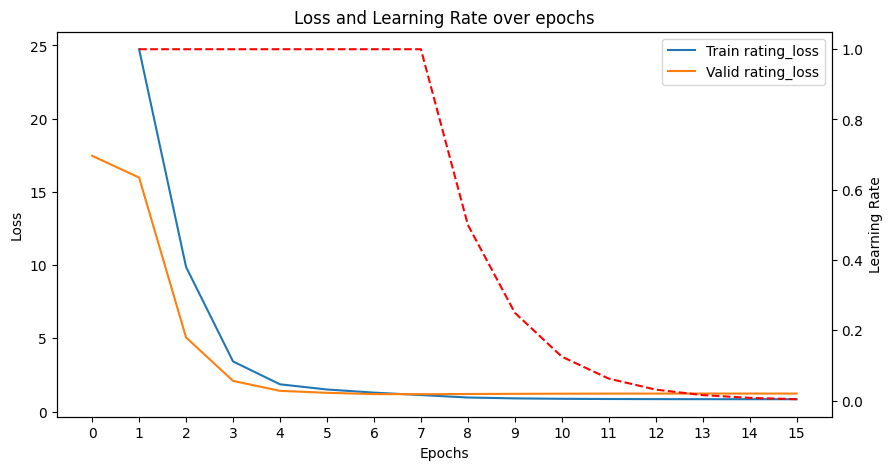

In [50]:
# Potser hauria de fer un learning rate decay gradual? Pq em sembla que ara mateix un cop començo a reduir
# el learning rate ja és massa tard, i hauria sigut millor potser anar-lo reduint a poc a poc

# sembla que reduint el pes del context fa que totes les reviews siguin iguals?

# com ara mateix que puja el valid_loss, a partir de l'època 6 probably no es guardarà ja a disc cap més model!

plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='rating_loss')

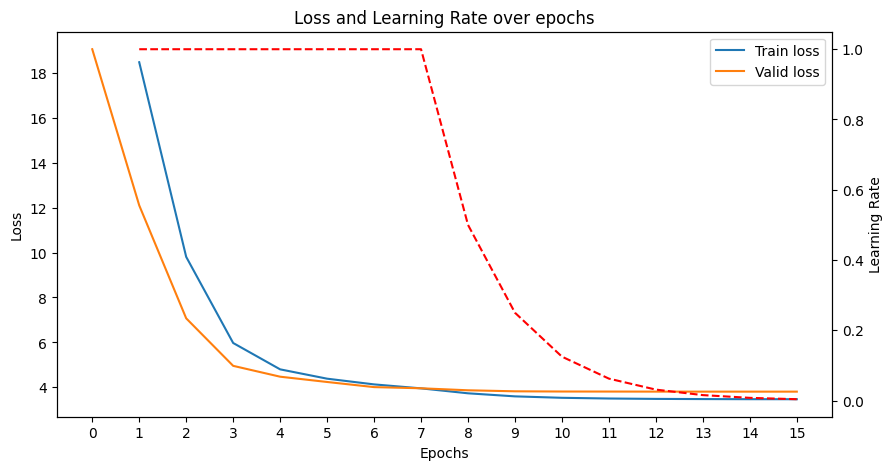

In [6]:
train_metrics = get_train_metrics('train_id_good7')
plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='loss')

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

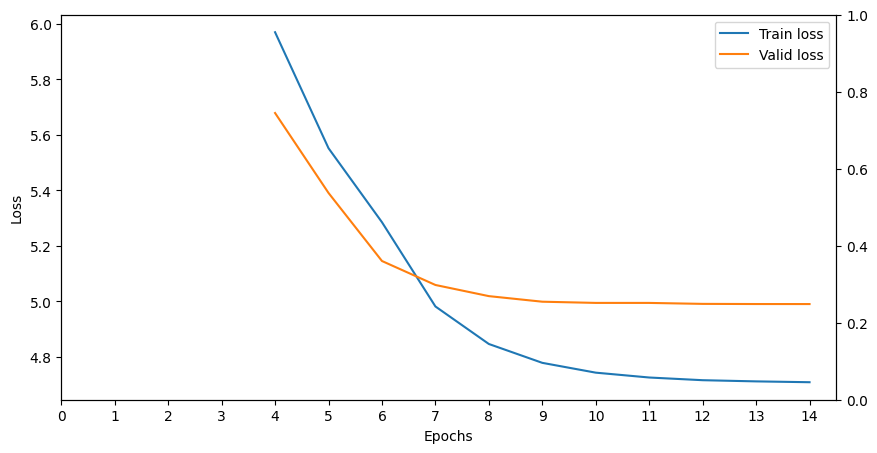

In [9]:
train_metrics = get_train_metrics('train_id_cross_2')

plot_train_valid_learn_rate2(train_metrics[4:], learn_rate=True, metric_name='loss')

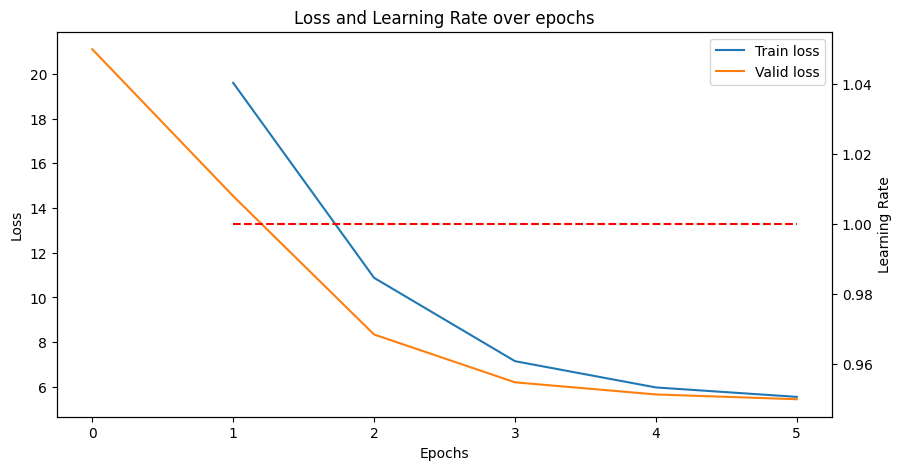

In [13]:
train_metrics = get_train_metrics('aaa_1')

plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='loss')

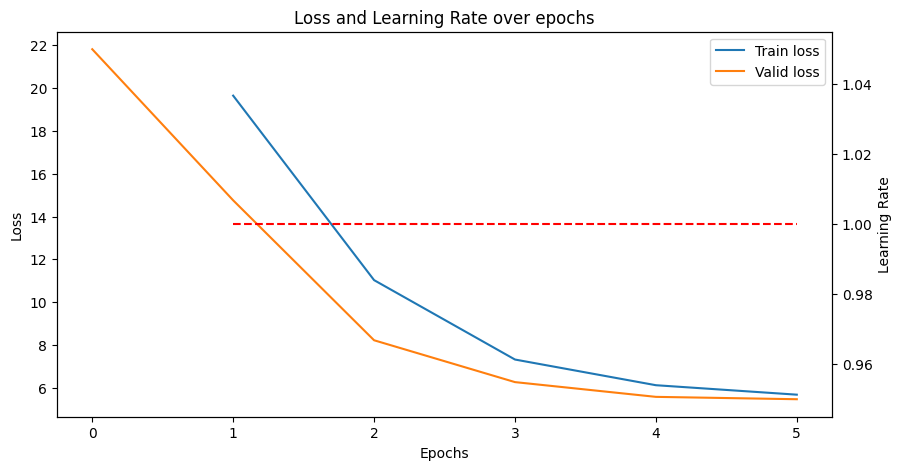

In [14]:
train_metrics = get_train_metrics('aaa_2')

plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='loss')

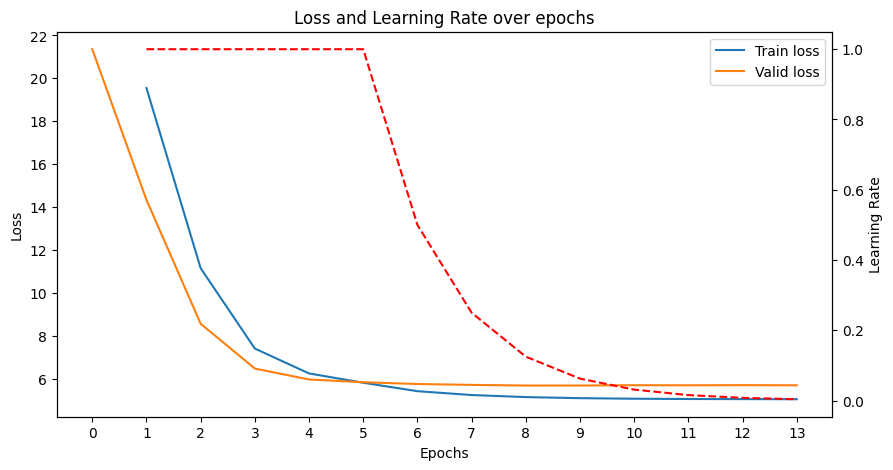

In [15]:
train_metrics = get_train_metrics('aaa_3')

plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='loss')

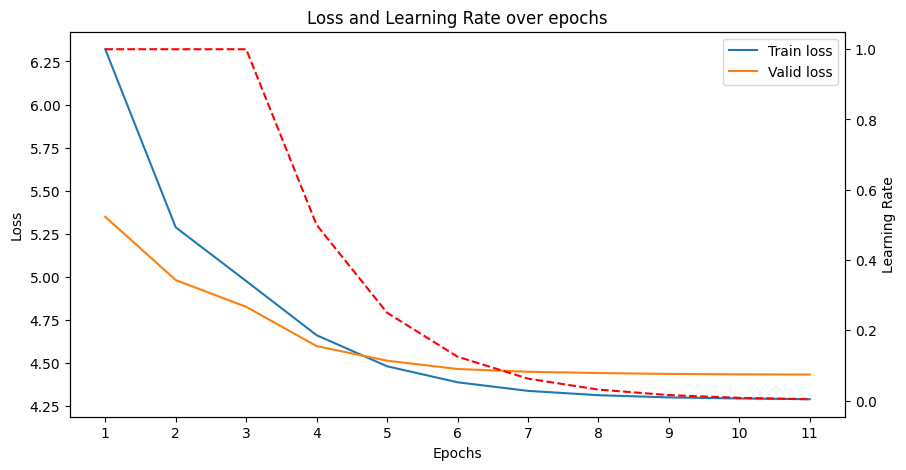

In [7]:
train_metrics = get_train_metrics('train_id_e2')

plot_train_valid_learn_rate2(train_metrics, learn_rate=True, metric_name='loss', skip_zero=True)